# Setup

In [1]:
"""
Add parent directorys to current path
"""
import os.path
import sys


for p in ['..', '../..', '../../..', '../../../..']:
    d = os.path.abspath(p)
    if d not in sys.path:
        sys.path.insert(0,d)

        
"""
Add tiger-env directory to current path
Still not sure why this is needed.
"""
d = [os.path.abspath('../../../../../custom_envs/gym-tiger'),
    os.path.abspath('../../../../../custom_envs/gym-dummy/')]
for _d in d:
    if _d not in sys.path:
        sys.path.insert(0, _d)


"""
Enable hot-reloading
"""    
from notebook_utils import import_module_by_name, reload_module_by_name


def reload():
    """Helper function for hot-reloading QLearnerObsActSeq class from source"""
    reload_module_by_name(
        'experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq',
        'QLearnerObsActSeq')
    reload_module_by_name(
        'experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer',
        'ObsActSeqFeatureTransformer')
    global QLearnerObsActSeq, play_one, ObsActSeqFeatureTransformer
    from experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq \
        import QLearnerObsActSeq, play_one
    from experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer \
        import ObsActSeqFeatureTransformer

# Tiger-v0

## Play 1 episode (100 steps per episode)

$$
Q(s_{t-1}, a_{t-1}) = Q(s_{t-1}, a_{t-1}) + \alpha \big[ r_t + \gamma \cdot Q(s_t, a_t) - Q(s_{t-1}, a_{t-1}) \big]
$$

In [36]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import plot_running_avg
from experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq \
    import QLearnerObsActSeq, play_one
from experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer \
    import ObsActSeqFeatureTransformer


env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=100, obs_accuracy=.85)

ft = ObsActSeqFeatureTransformer()

model = QLearnerObsActSeq(env, ft, initial_alpha=.5, gamma=.9, alpha_decay=.4,
                          seq_len=2)

eps = 0.5
n = 0
done = False
ot = env.reset()

# model.add_observation(ot)
# model.add_action(-1)

display(model.to_df())
print()
play_one(env, model, eps, verbose=True)
print()
display(model.to_df())


############################################################

from tabulate import tabulate
rows = []
for t, a in enumerate(env.action_episode_memory[2]):
        a = env.translate_action(a)
        if t < len(env.observation_episode_memory[2]):
            o = env.observation_episode_memory[2][t]
            o = env.translate_obs(o)
            r = env.reward_episode_memory[2][t]
        else:
            o = 'n/a'
            r = 'n/a'
        row = [t, a, o, r]
        rows.append(row)
rows = tabulate(rows, headers=['t', 'a', 'o', 'r'])
print(rows)

,a_t-0,o_t-0,a_t-1,o_t-1,OPEN_LEFT Q val,OPEN_RIGHT Q val,LISTEN Q val,best action



t     | o_t-1       | a_t-1      | r     | o_t         | a_t       
----------------------------------------------------------------------------------------------------
0     | START       | OPEN_RIGHT | -100  | GROWL_RIGHT | LISTEN    
1     | GROWL_RIGHT | LISTEN     | -1    | GROWL_LEFT  | OPEN_RIGHT
2     | GROWL_LEFT  | OPEN_RIGHT | 10    | GROWL_LEFT  | LISTEN    
3     | GROWL_LEFT  | LISTEN     | -1    | GROWL_RIGHT | OPEN_LEFT 
4     | GROWL_RIGHT | OPEN_RIGHT | -100  | GROWL_RIGHT | OPEN_RIGHT
5     | GROWL_RIGHT | OPEN_RIGHT | -100  | GROWL_RIGHT | LISTEN    
6     | GROWL_RIGHT | OPEN_LEFT  | -100  | GROWL_LEFT  | OPEN_LEFT 
7     | GROWL_LEFT  | LISTEN     | -1    | GROWL_RIGHT | OPEN_LEFT 
8     | GROWL_RIGHT | OPEN_RIGHT | -100  | GROWL_RIGHT | OPEN_LEFT 
9     | GROWL_RIGHT | OPEN_LEFT  | -100  | GROWL_LEFT  | OPEN_LEFT 
10    | GROWL_LEFT  | OPEN_LEFT  | -100  | GROWL_LEFT  | OPEN_LEFT 
11    | GROWL_LEFT  | OPEN_LEFT  | 10    | GROWL_RIGHT | OPEN_LEFT 
12    | GROWL_

,a_t-0,o_t-0,a_t-1,o_t-1,OPEN_LEFT Q val,OPEN_RIGHT Q val,LISTEN Q val,best action
0,OPEN_RIGHT,GROWL_LEFT,LISTEN,GROWL_RIGHT,1.84,-50.0,0.0,OPEN_LEFT
1,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_RIGHT,-24.42,-37.89,0.0,LISTEN
2,OPEN_RIGHT,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,1.85,0.0,0.0,OPEN_LEFT
3,OPEN_RIGHT,GROWL_RIGHT,OPEN_RIGHT,GROWL_RIGHT,-32.22,0.97,0.0,OPEN_RIGHT
4,OPEN_RIGHT,GROWL_RIGHT,OPEN_LEFT,GROWL_RIGHT,-11.67,0.94,-0.09,OPEN_RIGHT
5,OPEN_RIGHT,GROWL_RIGHT,OPEN_LEFT,GROWL_LEFT,-22.96,-7.12,-0.29,LISTEN
6,OPEN_LEFT,GROWL_LEFT,LISTEN,GROWL_RIGHT,1.36,-26.27,-0.15,OPEN_LEFT
7,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,0.0,0.0,-0.08,OPEN_LEFT
8,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_RIGHT,-4.98,0.0,0.0,OPEN_RIGHT
9,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,-16.37,-25.99,0.12,LISTEN


  t  a           o               r
---  ----------  -----------  ----
  0  NONE        START           0
  1  OPEN_RIGHT  GROWL_RIGHT  -100
  2  LISTEN      GROWL_LEFT     -1
  3  OPEN_RIGHT  GROWL_LEFT     10
  4  LISTEN      GROWL_RIGHT    -1
  5  OPEN_RIGHT  GROWL_RIGHT  -100
  6  OPEN_RIGHT  GROWL_RIGHT  -100
  7  OPEN_LEFT   GROWL_LEFT   -100
  8  LISTEN      GROWL_RIGHT    -1
  9  OPEN_RIGHT  GROWL_RIGHT  -100
 10  OPEN_LEFT   GROWL_LEFT   -100
 11  OPEN_LEFT   GROWL_LEFT   -100
 12  OPEN_LEFT   GROWL_RIGHT    10
 13  OPEN_LEFT   GROWL_RIGHT    10
 14  OPEN_LEFT   GROWL_LEFT   -100
 15  OPEN_LEFT   GROWL_LEFT   -100
 16  OPEN_LEFT   GROWL_LEFT   -100
 17  OPEN_RIGHT  GROWL_RIGHT  -100
 18  LISTEN      GROWL_RIGHT    -1
 19  OPEN_LEFT   GROWL_RIGHT    10
 20  OPEN_LEFT   GROWL_RIGHT    10
 21  OPEN_RIGHT  GROWL_LEFT     10
 22  OPEN_LEFT   GROWL_RIGHT    10
 23  OPEN_LEFT   GROWL_LEFT   -100
 24  LISTEN      GROWL_RIGHT    -1
 25  LISTEN      GROWL_RIGHT    -1
 26  OPEN_LEFT   GRO

## Play 100 Episodes (500 steps per episode)

avg reward for last (N-N%5) episodes: -15229.22


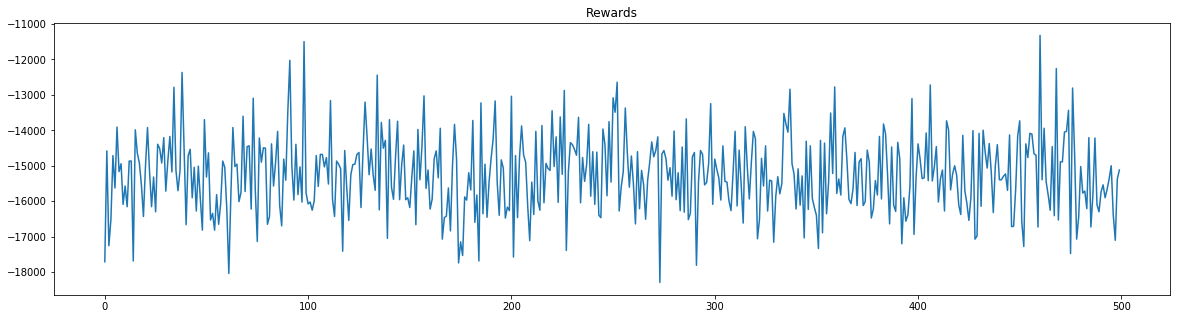

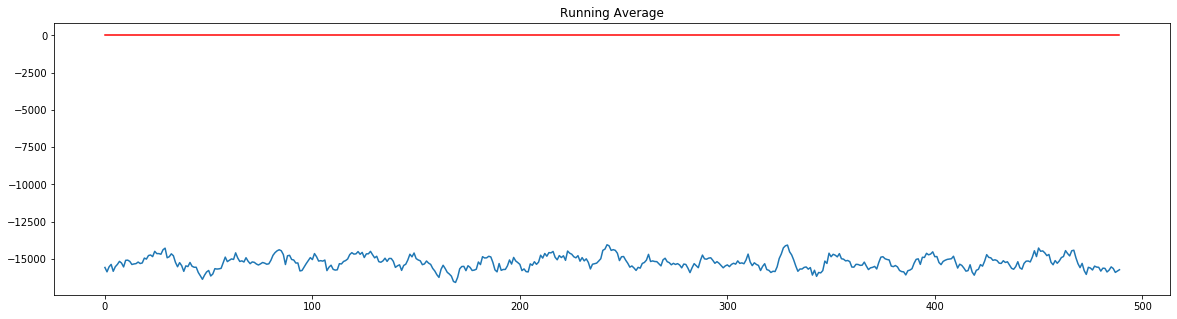

In [28]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import plot_running_avg
from experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq \
    import QLearnerObsActSeq, play_one
from experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer \
    import ObsActSeqFeatureTransformer


env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=500, obs_accuracy=.6)

ft = ObsActSeqFeatureTransformer()

model = QLearnerObsActSeq(env, ft, initial_alpha=.5, gamma=.9, alpha_decay=.4,
                          seq_len=4)

eps = 1
n = 0
done = False
ot = env.reset()

N = 500
totalrewards = np.empty(N)
for n in range(N):
#     eps = 0
#     if n > 100:
#         eps = 0
#     else:
#         eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward
#     if n % (N/5) == 0:
#         display(model.to_df())

print("avg reward for last (N-N%5) episodes:",
      totalrewards[int(N-(N/5)):].mean())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards[10:], window=5)

## Inspect model

In [29]:
df = model.to_df()

df[((df['OPEN_LEFT UPDATE COUNT'] > 10)
   | (df['OPEN_RIGHT UPDATE COUNT'] > 10)
   | (df['LISTEN UPDATE COUNT'] > 10))].filter(regex='^((?!COUNT).)*$')

,a_t-4,o_t-3,a_t-3,o_t-2,a_t-2,o_t-1,a_t-1,o_t-0,OPEN_LEFT Q VALUE,OPEN_RIGHT Q VALUE,LISTEN Q VALUE,BEST ACTION
0,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,-7.46,-13.12,-0.17,LISTEN
1,OPEN_LEFT,GROWL_LEFT,OPEN_RIGHT,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,OPEN_LEFT,GROWL_RIGHT,-19.15,-8.44,-0.15,LISTEN
2,OPEN_RIGHT,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_RIGHT,-13.69,-14.18,-0.66,LISTEN
3,OPEN_RIGHT,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,-11.56,-13.85,-0.37,LISTEN
4,OPEN_RIGHT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_RIGHT,LISTEN,GROWL_LEFT,-18.24,-11.9,-0.58,LISTEN
5,OPEN_RIGHT,GROWL_LEFT,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_RIGHT,LISTEN,GROWL_RIGHT,-12.23,-13.33,-0.33,LISTEN
6,OPEN_LEFT,GROWL_LEFT,OPEN_LEFT,GROWL_RIGHT,LISTEN,GROWL_LEFT,LISTEN,GROWL_RIGHT,-11.55,-32.35,-0.33,LISTEN
7,OPEN_LEFT,GROWL_RIGHT,LISTEN,GROWL_LEFT,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,-14.89,-11.7,-0.34,LISTEN
8,OPEN_LEFT,GROWL_RIGHT,LISTEN,GROWL_LEFT,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_RIGHT,-11.11,-13.55,-0.29,LISTEN
9,LISTEN,GROWL_LEFT,LISTEN,GROWL_RIGHT,OPEN_RIGHT,GROWL_RIGHT,OPEN_RIGHT,GROWL_LEFT,-15.71,-16.15,-0.49,LISTEN


In [18]:
df = model.to_df()
df[(df['BEST ACTION'] != 'LISTEN') & (
      (df['OPEN_LEFT UPDATE COUNT'] > 10)
    | (df['OPEN_RIGHT UPDATE COUNT'] > 10)
    | (df['LISTEN UPDATE COUNT'] > 10)
)].filter(regex='^((?!COUNT).)*$')

,a_t-2,o_t-1,a_t-1,o_t-0,OPEN_LEFT Q VALUE,OPEN_RIGHT Q VALUE,LISTEN Q VALUE,BEST ACTION
1,LISTEN,GROWL_LEFT,LISTEN,GROWL_LEFT,-72.77,42.78,10.0,OPEN_RIGHT
14,OPEN_LEFT,GROWL_LEFT,LISTEN,GROWL_LEFT,-31.6,-0.2,-1.23,OPEN_RIGHT
33,LISTEN,GROWL_RIGHT,LISTEN,GROWL_RIGHT,47.03,-67.21,17.38,OPEN_LEFT


# TwoInARow-v0

avg reward for last 20.0 episodes: 99.2


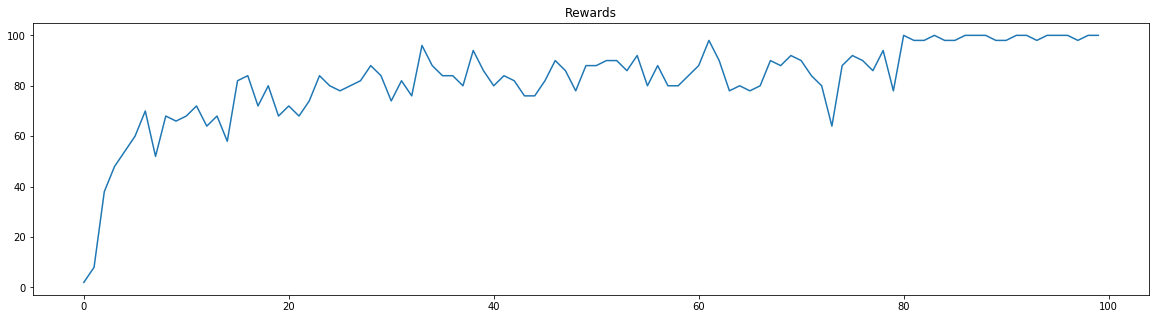

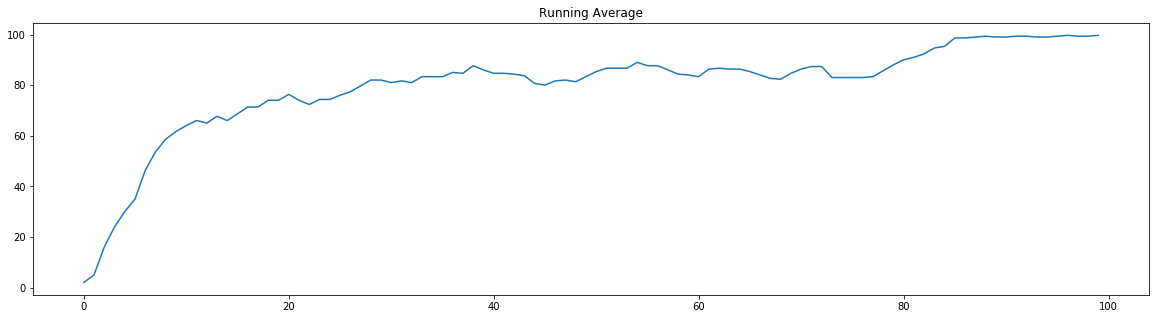

In [4]:
import gym
import gym_dummy
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import play_one, plot_running_avg
from experiments.qlearning.basic.qlearner_obs_seq.qlearner_obs_seq \
    import QLearnerObsSeq
from experiments.qlearning.basic.qlearner_obs_seq.feature_transformer \
    import SeqFeatureTransformer

env = gym.make('TwoInARow-v0')
ft = SeqFeatureTransformer()
model = QLearnerObsSeq(env, ft, initial_alpha=.5, gamma=.9, alpha_decay=.4,
                       seq_len=2, translate=False)
eps = 1
n = 0
done = False
ot = env.reset()

N = 100
totalrewards = np.empty(N)
for n in range(N):
    if n >= N - (N/5):
        eps = 0
    else:
        eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward

print("avg reward for last {} episodes:".format(N/5),
      totalrewards[int(-1*(N/5)):].mean())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards, window=5)

In [13]:
display(model.last_n_obs)
model.predict([1])

[[0], [0]]

array([ 0.25381239, -1.88289797])